<a href="https://colab.research.google.com/github/yustinaivanova/netology_statistics/blob/master/dz_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Материалы Юстины Ивановой: https://github.com/yustinaivanova/netology_statistics_february_20

# Домашнее задание по статистическому анализу на python

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
import statistics
from scipy.stats import pearsonr
from sklearn import preprocessing
import seaborn as sns

Загрузить датасет по url:


In [139]:
# следующая строчка подключает сертификат для защищенного соединения
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
# все данные загружаются с сервера
url="http://yustiks.ru/dataset/world-happiness-report-2019.csv"
df=pd.read_csv(url)

Более подробно о датасете можно прочитать по [данной ссылке](https://data.world/promptcloud/world-happiness-report-2019) или по [ссылке в kaggle](https://www.kaggle.com/PromptCloudHQ/world-happiness-report-2019)

Context

The World Happiness Report is a landmark survey of the state of global happiness that ranks 156 countries by how happy their citizens perceive themselves to be. This year’s World Happiness Report focuses on happiness and the community: how happiness has evolved over the past dozen years, with a focus on the technologies, social norms, conflicts and government policies that have driven those changes.



*  **Country (region)** Name of the country.
*  **Ladder** Cantril Ladder is a measure of life satisfaction.
*  **SD of Ladder** Standard deviation of the ladder.
*  **Positive affect** Measure of positive emotion.
*  **Negative affect** Measure of negative emotion.
*  **Social support** The extent to which Social support contributed to the calculation of the Happiness Score.
*  **Freedom** The extent to which Freedom contributed to the calculation of the Happiness Score.
*  **Corruption** The extent to which Perception of Corruption contributes to Happiness Score.
*  **Generosity** The extent to which Generosity contributed to the calculation of the Happiness Score.
*  **Log of GDP per capita** The extent to which GDP contributes to the calculation of the Happiness Score.
*  **Healthy life expectancy** The extent to which Life expectancy contributed to the calculation of the Happiness Score.

Посмотреть первые несколько рядов таблицы

In [140]:
df.head()


,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy
0,Finland,1,4,41.0,10.0,2.0,5.0,4.0,47.0,22.0,27.0
1,Denmark,2,13,24.0,26.0,4.0,6.0,3.0,22.0,14.0,23.0
2,Norway,3,8,16.0,29.0,3.0,3.0,8.0,11.0,7.0,12.0
3,Iceland,4,9,3.0,3.0,1.0,7.0,45.0,3.0,15.0,13.0
4,Netherlands,5,1,12.0,25.0,15.0,19.0,12.0,7.0,12.0,18.0


Построить частотный график для двух параметров: Freedom и positive affect. Какое это распределение?

/Users/mihailprihodko/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/mihailprihodko/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


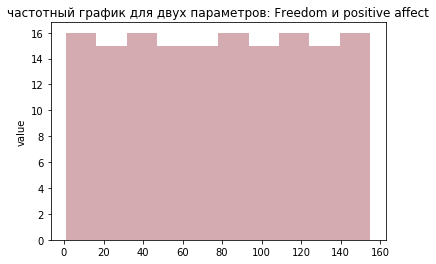

In [141]:

fig, ax = plt.subplots() 
ax.hist(df['Freedom'], color='red', alpha=0.5) 
ax.hist(df['Positive affect'], color='lightblue', alpha=0.5) 
ax.set(title='частотный график для двух параметров: Freedom и positive affect', ylabel='value') 
ax.margins(0.05) 
ax.set_ylim(bottom=0) 
plt.show()

# два графика полностью накладываются друг на друга и это нормальное распределение



Найти медиану, моду, математическое ожидание, стандартное отклонение,  дисперсию, минимум и максимум, найти выбросы (если есть), размах для колонки Freedom

In [70]:
#df[df['Freedom'].isnull()] # для начала проверим есть ли отсутствующие значения в анализируемом столбце
#df1= df[df['Freedom'].isnull()]
df1 = df.drop(df.index[[28]]) #удаляем данную строку 
df1[df1['Freedom'].isnull()] #проверяем

,Country (region),Ladder,SD of Ladder,Positive affect,Negative affect,Social support,Freedom,Corruption,Generosity,Log of GDP\nper capita,Healthy life\nexpectancy


In [87]:

print('Значение медианы: ', statistics.median(df1['Freedom']))
#print('Значение моды: ', statistics.mode(df1['Freedom'])
print('Математическое ожидание:',statistics.mean(df1['Freedom']))
print('Стандартное отклонение:',statistics.pstdev(df1['Freedom']))
print('Дисперсия:',statistics.pvariance(df1['Freedom']))
print('Минимум:',min(df1['Freedom']))
print('Максимум:',max(df1['Freedom']))
# выброс в качестве отсутствующего значения мы исправили , и так как у нас медиана и мат.ожидание равны 
# могу предположить ,что выбросы отсутствуют
freedom_range = max(df1['Freedom']) - min(df1['Freedom'])
print('Размах:', freedom_range)

Значение медианы:  78.0
Математическое ожидание: 78.0
Стандартное отклонение: 44.74371464239419
Дисперсия: 2002.0
Минимум: 1.0
Максимум: 155.0
Размах: 154.0


Почему нельзя найти моду?

In [0]:
# потому что нет повторяющихся значений

Посмотреть корреляцию между Freedom и positive affect (графически и математически). Графически - plt.scatter, математически - посчитать коэффициент Пирсона. О чем говорит знак коэффициента?

In [ ]:
df[df['Positive affect'].isnull()] # есть отсутствущее значение , поэтому используем для работы df1 (гдк убрана 28 строка)


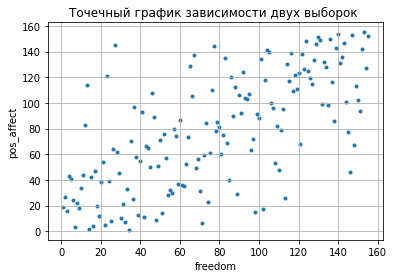

78.0
0.0
155
155
Корреляция: 0.6817698430601656
Коэффициент корреляции Пирсона: 0.6817698430601657


In [111]:
freedom = df1['Freedom']
pos_affect = df1['Positive affect']
x = freedom
y = pos_affect
plt.xlabel('freedom')
plt.ylabel('pos_affect')
plt.title('Точечный график зависимости двух выборок ')
plt.grid(True)
plt.scatter(x, y, marker='.')
plt.show()

# для нахождения коэффициента необходимо произвести следующие манимуляции
# 1)нормализовать данные
print(statistics.mean(freedom))
freedom_1 = freedom - statistics.mean(freedom)
print(statistics.mean(freedom_1)) # значение = 0 , поэтому данные нормализованы
# 2)данные измерены в одной интервальной шкале
# 3)количество значений двух переменных должно быть одинаково
print(len(freedom))
print(len(pos_affect))
# они оба равны 155, после этого мы можем посчитать коэффициент Пирсона

print ('Корреляция:', x.corr(y)) # математическая корреляция между значениями

corr, p_value = pearsonr(x, y) 
print('Коэффициент корреляции Пирсона:', corr) # коэффициент говорит о слабой положительной корреляции




Нормализовать данные колонки Freedom (централизация + масштабирование)

In [114]:
df1['Freedom']# данные уже централизованы
# ниже проведем масштабирование (-1,1)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(-1,1))
freedom1 = min_max_scaler.fit_transform(np.array(freedom).reshape(-1, 1))
print(min(freedom1))
print(max(freedom1))

[-1.]
[1.]


Построить матрицу корреляций для всех колонок таблицы

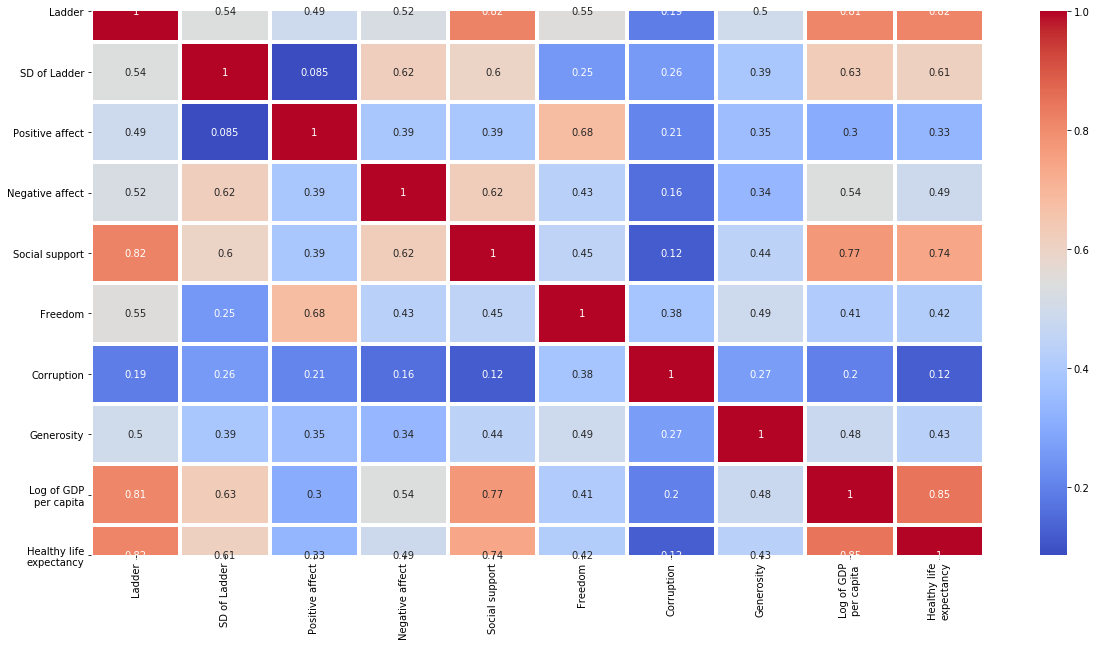

In [129]:
sns.heatmap(df.corr(),annot=True,cmap='coolwarm',linewidths=3)
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.show()

Загрузить таблицу цен на авокадо: 

In [144]:
df_1=pd.read_csv('avocado.csv')
df_1[:3]
#len(df_1)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


Сделать частотный график колонки AveragePrice. Какое это распределение?

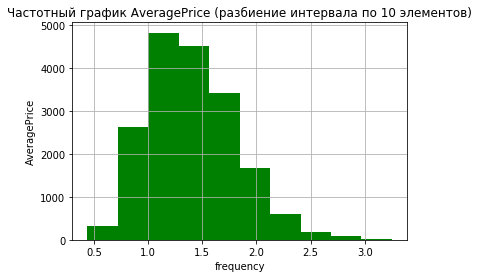

In [142]:
n, bins, patches = plt.hist(df_1['AveragePrice'], 10, facecolor='g')
plt.xlabel('frequency')
plt.ylabel('AveragePrice')
plt.title('Частотный график AveragePrice (разбиение интервала по 10 элементов)')
plt.grid(True)
plt.show()
# это нормальное распределение

Найти корреляцию в следующих колонках:

колонкой 4046, 4225, 4770 и Average Price. Если корелляция есть (обратная или прямая), то какие выводы можно сделать?

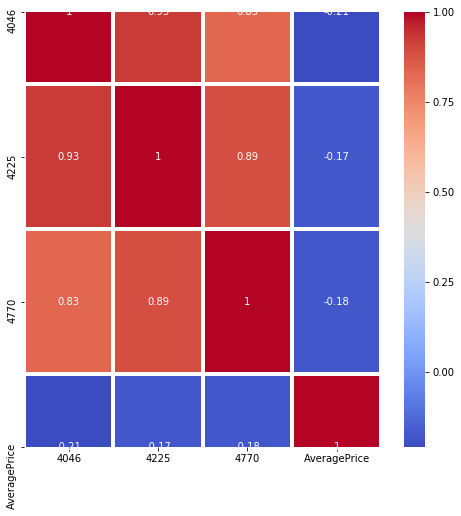

In [161]:
df_2 = df_1[['4046','4225','4770','AveragePrice']]
df_2.head()
sns.heatmap(df_2.corr(),annot=True,cmap='coolwarm',linewidths=3)
fig=plt.gcf()
fig.set_size_inches(8,8)
plt.show()
# корреляция есть и она обратная , если стобцы 4046,4225,4770 - это размер покупки, то чем больше размер покупки ,
# то - меньше средняя цена